In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [14]:
torch.manual_seed(42) # for reproducibility

In [15]:
train_df = pd.read_csv(r'c:\Desktop\datasets\Fashion_mnist\fashion-mnist_train.csv')

In [16]:
test_df = pd.read_csv(r"C:\Desktop\datasets\Fashion_mnist\fashion-mnist_test.csv")

In [17]:
train_df.shape

(60000, 785)

In [18]:
test_df.shape

(10000, 785)

In [19]:
x_train = train_df.drop("label", axis=1)
y_train = train_df["label"]
x_test = test_df.drop('label', axis=1)
y_test = test_df['label']

In [20]:
x_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


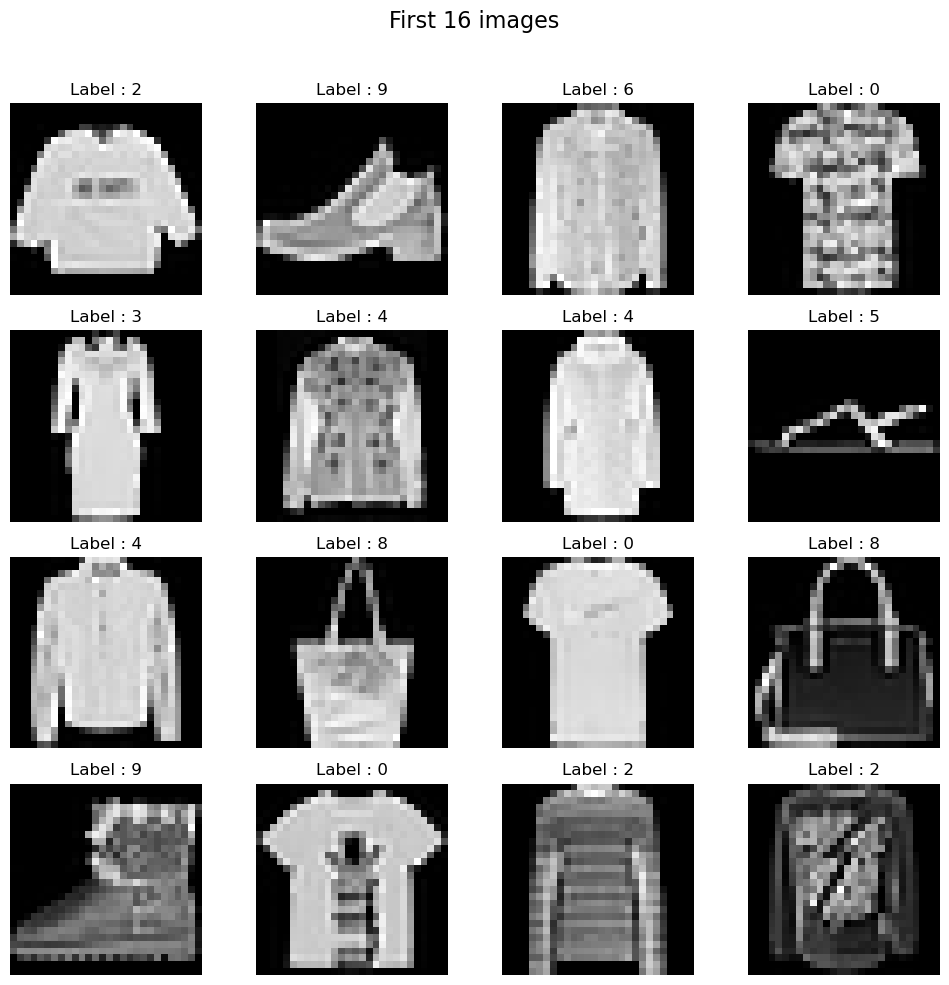

In [21]:
# create a 4x4 grid of images

fig,axes = plt.subplots(4,4,figsize=(10,10))
fig.suptitle("First 16 images", fontsize=16)

for i ,ax in enumerate(axes.flat):
  img = train_df.iloc[i, 1:].values.reshape(28,28) # reshape 28x28
  ax.imshow(img, cmap='gray')   # display in grayscale
  ax.axis('off')  # remove axes for cleaner look
  ax.set_title(f"Label : {train_df.iloc[i,0]}")  # show the label

plt.tight_layout(rect=[0, 0, 1, 0.96])  # adjust layout to fit the title
plt.show()

In [22]:
# scalling features

x_train = x_train/255.0
x_test = x_test/255.0

In [23]:
x_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.019608,0.0,0.0,...,0.000000,0.000000,0.000000,0.117647,0.168627,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.003922,0.007843,0.0,0.0,0.000000,0.0,0.0,...,0.011765,0.000000,0.000000,0.000000,0.000000,0.003922,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.286275,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.627451,0.635294,0.639216,0.529412,0.368627,0.000000,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [24]:
# create custom dataset class

class CustomDataset(Dataset):

  def __init__(self, features, labels):
    self.features = torch.tensor(features, dtype=torch.float32)
    self.labels = torch.tensor(labels, dtype=torch.long)

  def __len__(self):
    return len(self.features)

  def __getitem__(self, idx):
    return self.features[idx], self.labels[idx]

In [25]:
# create train_dataset, test_dataset obj

train_dataset = CustomDataset(x_train.values, y_train.values)
test_dataset = CustomDataset(x_test.values, y_test.values)

In [26]:
train_dataset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0157, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.2431, 0.2392, 0.0824, 0.1137, 0.0902,
         0.2000, 0.5333, 0.2392, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [27]:
# create train, test dataloader

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)  # test or pred k time we dont shuffle as to calculate accuracy we need to predict on each and every datapt

In [28]:
# define model class

class FashionMnist(nn.Module):

  def __init__(self, num_features):

    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(num_features, 128),
        nn.BatchNorm1d(128),
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(128,64),
        nn.BatchNorm1d(64),
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(64, 10)
    )

  def forward(self, x):

     return self.model(x)

In [29]:
epochs = 100
learning_rate = 0.05

In [30]:
# instantiate model
model = FashionMnist(x_train.shape[1])

In [31]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [32]:
for epoch in range(epochs):

  total_epoch_loss = 0.0

  for batch_features, batch_labels in train_loader:

    # forward pass
    outputs = model(batch_features)

    # calculate loss
    loss = criterion(outputs, batch_labels)


    #back prop
    optimizer.zero_grad() # grads set to zero
    loss.backward()  # grads calculated


    # upddate grads
    optimizer.step()

    total_epoch_loss =   total_epoch_loss + loss.item()


  avg_loss = total_epoch_loss/ len(train_loader)
  print(f'Epoch: {epoch + 1}, Loss: {avg_loss}')

Epoch: 1, Loss: 0.6260985909620921
Epoch: 2, Loss: 0.487487010272344
Epoch: 3, Loss: 0.4487164515376091
Epoch: 4, Loss: 0.4284709401845932
Epoch: 5, Loss: 0.40815218594471614
Epoch: 6, Loss: 0.39601867810487745
Epoch: 7, Loss: 0.38920619539022444
Epoch: 8, Loss: 0.37995021148522695
Epoch: 9, Loss: 0.3693141460696856
Epoch: 10, Loss: 0.3621167292535305
Epoch: 11, Loss: 0.35280058648983637
Epoch: 12, Loss: 0.34868644104798635
Epoch: 13, Loss: 0.3460421958446503
Epoch: 14, Loss: 0.33974545661211014
Epoch: 15, Loss: 0.3393623923222224
Epoch: 16, Loss: 0.33330874005556105
Epoch: 17, Loss: 0.32655003246863684
Epoch: 18, Loss: 0.32467844670613605
Epoch: 19, Loss: 0.3217926191886266
Epoch: 20, Loss: 0.31897987781961756
Epoch: 21, Loss: 0.3132500481247902
Epoch: 22, Loss: 0.3116183517297109
Epoch: 23, Loss: 0.30888483875791234
Epoch: 24, Loss: 0.3084896482467651
Epoch: 25, Loss: 0.30510154303312303
Epoch: 26, Loss: 0.30317900351484617
Epoch: 27, Loss: 0.29968832269907
Epoch: 28, Loss: 0.2988490

In [33]:
# we 've to set model to eval mode
# why ?
# nn ma amuk eva features hoi j testing and training time a alg behave kare
# eg. dropouts train time randomly turn off some neurons
#     test time we predict for all meurons
# eg.  batch normalization  # we calculate mean,std dev at trining time and use that only at prediction time




model.eval()

FashionMnist(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.3, inplace=False)
    (8): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [34]:
len(test_loader)

313

In [35]:
# evaluation code:

total = 0
correct = 0

with torch.no_grad():
  for batch_features, batch_labels in test_loader:

    outputs = model(batch_features)   # tensor with probabilities of each class label
    _, predicted = torch.max(outputs, 1)  # class extracted corresponding to each img

    total = total + batch_labels.shape[0]   # 32 batch size adds up every time

    correct = correct + (predicted == batch_labels).sum().item()

accuracy = correct/total
print(f'Accuracy: {accuracy}')

Accuracy: 0.8955


model overfitting 

In [36]:
# test accuracy = 0.8851
# training accuracy = 0.9214 

accuracy after dropouts and batch normalization 

In [ ]:
# test accuracy = 0.8955
# train accuracy = 0.9549

In [38]:
# overfitting reduced highly 